In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')

In [2]:
data = pd.read_csv("DATA111_2DAILY_V0.csv")

In [3]:
data2 = pd.read_csv('base_222.csv', encoding =' latin-1')

In [4]:
data2.head()

,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. máxima do Vento a 5 metros (m/s),Veloc. máxima do Vento a 2 metros (m/s),Direção do Vento no instante da veloc. Máx.(°),Horário de ocorrência vr máx. veloc. do vento,Radiação Incidente Total do dia (KW/m2),Radiação Refletida Total do dia (KW/m2),...,Fluxo Negativo de calor no solo. Total do dia (KW/m2),Temperatura do Ar Máxima do dia (°C),Horário de ocorrência da Temp. Ar Máxima(°C),Temperatura do Ar Mínima do dia (°C),Horário de ocorrência da Temp. Ar Minima,Temperatura do Solo 1 Máxima do dia (°C),Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm)
0,222,1997,1,2400,6031.00,2677.0,99.60,1923,270.8,53.81,...,-34.76,30.16,1255,18.50,551.0,34.53,1258,19.15,606.0,0.0
1,222,1997,2,2400,4756.00,1758.0,119.50,45,165.3,27.46,...,-26.86,26.15,1417,19.15,2355.0,27.66,1425,19.65,2352.0,0.0
2,222,1997,3,2400,5227.00,2631.0,3412.00,337,231.5,44.02,...,-27.57,25.74,1208,17.84,2333.0,34.49,1214,18.10,551.0,0.0
3,222,1997,4,2400,3.58,2095.0,5864.00,2053,263.7,53.38,...,-20.56,29.69,1625,17.81,126.0,37.73,1630,19.25,329.0,0.0
4,222,1997,5,2400,5.58,2509.0,13.03,1755,328.7,70.90,...,-23.58,31.36,1543,17.95,535.0,46.95,1321,20.55,601.0,0.0


In [5]:
data2 = data2.rename(columns={'Dia Juliano': 'DAY365', 'Ano':'YEAR', 'Temperatura do Ar  Máxima do dia (°C)':'MAX_N_AIRTMP_MED10', 'Temperatura do Ar Mínima do dia (°C)':'MIN_N_AIRTMP_MED10'})

In [6]:
data2.columns.values

array(['Cod', 'YEAR', 'DAY365', 'Hora - minuto',
       'Veloc. máxima do Vento a 5 metros (m/s)',
       'Veloc. máxima do Vento a 2 metros (m/s)',
       'Direção do Vento no instante da veloc. Máx.(°)',
       'Horário de ocorrência vr máx. veloc. do vento',
       'Radiação Incidente Total do dia (KW/m2)',
       'Radiação Refletida Total do dia (KW/m2)',
       'Fluxo positivo de calor no solo Total do dia (KW/m2)',
       'Fluxo Negativo de calor no solo. Total do dia (KW/m2)',
       'MAX_N_AIRTMP_MED10',
       'Horário de ocorrência da Temp. Ar Máxima(°C)',
       'MIN_N_AIRTMP_MED10', 'Horário de ocorrência da Temp. Ar Minima',
       'Temperatura do Solo 1 Máxima do dia (°C)',
       'Horário de ocorrência da Temp. Solo 1 Máxima.',
       'Temperatura do Solo 1 Mínima do dia (°C)',
       'Horário de ocorrência da Temp. Solo 1 minima',
       'Chuva total do dia (mm)'], dtype=object)

In [7]:
data2['MIN_N_AIRTMP_MED10'] = pd.to_numeric( data2['MIN_N_AIRTMP_MED10'], errors = 'coerce')
data2['MAX_N_AIRTMP_MED10'] = pd.to_numeric( data2['MAX_N_AIRTMP_MED10'], errors = 'coerce')
data2['DAY365'] = pd.to_numeric( data2['DAY365'], errors = 'coerce')
data2['YEAR'] = pd.to_numeric( data2['YEAR'], errors = 'coerce')

In [8]:
data2[(data2.YEAR == 1999)&(data2.DAY365 == 55)]

,Cod,YEAR,DAY365,Hora - minuto,Veloc. máxima do Vento a 5 metros (m/s),Veloc. máxima do Vento a 2 metros (m/s),Direção do Vento no instante da veloc. Máx.(°),Horário de ocorrência vr máx. veloc. do vento,Radiação Incidente Total do dia (KW/m2),Radiação Refletida Total do dia (KW/m2),...,Fluxo Negativo de calor no solo. Total do dia (KW/m2),MAX_N_AIRTMP_MED10,Horário de ocorrência da Temp. Ar Máxima(°C),MIN_N_AIRTMP_MED10,Horário de ocorrência da Temp. Ar Minima,Temperatura do Solo 1 Máxima do dia (°C),Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm)
736,222,1999,55,2400,3285.0,2344.0,174.4,1446,0.0,0.0,...,-30.48,29.86,1610,16.9,552.0,31.91,1443,19.95,614.0,0.8
737,222,1999,55,2400,0.0,0.0,34.6,2400,0.0,0.0,...,0.0,26.99,2400,0.0,0.0,30.1,2400,0.00,0.0,0.0
738,222,1999,55,2400,3285.0,2344.0,174.4,1446,0.0,0.0,...,-30.48,29.86,1610,16.9,552.0,31.91,1443,19.95,614.0,0.8
739,222,1999,55,2400,0.0,0.0,34.6,2400,0.0,0.0,...,0.0,26.99,2400,0.0,0.0,30.1,2400,0.00,0.0,0.0


In [9]:
data3 = data2.drop_duplicates(subset=['YEAR','DAY365'])

In [10]:
data2.isnull().sum()

Cod                                                        0
YEAR                                                       0
DAY365                                                     0
Hora - minuto                                              0
Veloc. máxima do Vento a 5 metros (m/s)                    0
Veloc. máxima do Vento a 2 metros (m/s)                    0
Direção do Vento no instante da veloc. Máx.(°)             0
Horário de ocorrência vr máx. veloc. do vento              0
Radiação Incidente Total do dia (KW/m2)                    0
Radiação Refletida Total do dia (KW/m2)                    0
Fluxo positivo de calor no solo Total do dia (KW/m2)       0
Fluxo Negativo de calor no solo. Total do dia (KW/m2)      0
MAX_N_AIRTMP_MED10                                         2
Horário de ocorrência da Temp. Ar Máxima(°C)               1
MIN_N_AIRTMP_MED10                                         1
Horário de ocorrência da Temp. Ar Minima                   1
Temperatura do Solo 1 Má

In [11]:
for y in data3.YEAR.unique():
    print(y)
    df_aux = data3[data3.YEAR == y]
    df = df_aux.groupby('DAY365').agg({'YEAR':'count'}).reset_index()
    print(df[df.YEAR > 1])

1997
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
1998
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
1999
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2000
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2001
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2002
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2003
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2004
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2006
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2007
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2008
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2009
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2010
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2011
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2012
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2013
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2014
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2015
Empty DataFrame
Columns: [DAY365, YEAR]
Index: []
2016
Empty

In [12]:
data2 = data2.dropna()

In [13]:
# To better visualyze the heat waves we wil work with a shifted dataframe starting in winter

data2['NEW_DAY'] = data2['DAY365']

data2.loc[data2['DAY365'] < 152 ,'NEW_DAY'] = data2[data2['DAY365'] < 152]['DAY365'].values + 214
data2.loc[data2['DAY365'] >= 152, 'NEW_DAY'] = data2[data2['DAY365'] >= 152]['DAY365'].values - 151

In [14]:
# To better visualyze the heat waves we wil work with a shifted dataframe starting in winter

data['NEW_DAY'] = data['DAY365']

data.loc[data['DAY365'] < 152 ,'NEW_DAY'] = data[data['DAY365'] < 152]['DAY365'].values + 214
data.loc[data['DAY365'] >= 152, 'NEW_DAY'] = data[data['DAY365'] >= 152]['DAY365'].values - 151

# Implementation of a Geirinhas Definition of Heatwaves

According to the paper Geirinhas define a heatwave  as follow:

3 or more consecutive days with max air temperature and min air temperature above Percentil 90th in a 15 days window centered in the target day.

In [90]:
import matplotlib.patches as mpatches

#OLD
# def get_colors(df, var_temp,n=5):
#     max_temp = df[var_temp].max()
#     colors = []
    
#     aux_df = df.copy()
    
#     aux_df['bins'] = pd.qcut(aux_df[var_temp], n, labels=False, duplicates='drop')
    
#     for tmp in aux_df['bins']:

#         color = (1,tmp/n,0)
#         colors.append(color)

    
#     return colors, aux_df

def get_hcolors(df, var_temp,mean,pct90):
    
    colors = []
    
    aux_df = df.copy()
    
    for tmp in aux_df[var_temp]:
        
        if(tmp < mean):
            color = (1,0.8,0)
        elif(tmp > pct90):
            color = (0,0,0)
        else:
            color = (1,0.1,0)
            
        colors.append(color)

    
    return colors, aux_df

def plot_heatwave(df, FLAG_HEATWAVE,var_temperature = 'MAX_N_AIRTMP_MED10'):
    # Draw horizontal lines
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
    ax.hlines(y=np.arange(df.YEAR.nunique()), xmin=0, xmax=3000, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

    
    #getting pct of all temperature
    mean = df[df[FLAG_HEATWAVE] != 0][var_temperature].mean()
    pct90 = df[df[FLAG_HEATWAVE] != 0][var_temperature].quantile(.9)
    
     # Draw the Dots
    for i, make in enumerate(df.YEAR.unique()):
        df_make = df.loc[(df.YEAR==make) & (df[FLAG_HEATWAVE] != 0), :]

        colors, aux_df = get_hcolors(df_make, var_temperature, mean, pct90)

        ax.scatter(y=np.repeat(i, df_make.shape[0]), x='NEW_DAY', data=df_make, s=75, edgecolors=colors , c=colors , alpha=0.7)



    # Decorations

    # Vertical Lines to indicate Stations according to https://www.calendario-365.com.br/epocas-estacoes-do-ano.html
    ax.vlines(x= 360 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
    ax.vlines(x= 90 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
    ax.vlines(x= 180, ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
    ax.vlines(x= 270 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')

    #Annotates
    ax.text(45, 22, " Winter ", fontdict={'size':20}, color='indigo')
    ax.text(125, 22, " Spring ", fontdict={'size':20}, color='indigo')
    ax.text(215, 22, " Summer ", fontdict={'size':20}, color='indigo')
    ax.text(300, 22, " Fall ", fontdict={'size':20}, color='indigo')


    #Corpse
    # ax.set_title('Monthly heatwaves distribution by years', fontdict={'size':22})
    ax.set_xlabel('Days', alpha=0.7, fontdict={'size':12})
    ax.set_yticks(np.arange(df.YEAR.nunique()))
    ax.set_yticklabels(df.YEAR.unique(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
    ax.set_xlim(0, 370)
    plt.xticks(alpha=0.7)
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["bottom"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)    
    plt.gca().spines["left"].set_visible(False)   
    plt.grid(axis='both', alpha=.4, linewidth=.1)
    plt.show()
    
    
    
# Plot  coldwaves

def get_ccolors(df, var_temp,mean,pct10):
    
    colors = []
    
    aux_df = df.copy()
    
    for tmp in aux_df[var_temp]:
        
        if(tmp > mean):
            color = (0,0.8,1)
        elif(tmp < pct10):
            color = (0,0,0)
        else:
            color = (0,0.1,1)
            
        colors.append(color)

    
    return colors, aux_df

def plot_coldwave(df, FLAG_COLDWAVE,var_temperature = 'MIN_N_AIRTMP_MED10'):
    # Draw horizontal lines
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
    ax.hlines(y=np.arange(df.YEAR.nunique()), xmin=0, xmax=3000, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

    
    #getting pct of all temperature
    mean = df[df[FLAG_COLDWAVE] != 0][var_temperature].mean()
    pct10 = df[df[FLAG_COLDWAVE] != 0][var_temperature].quantile(.1)
    
     # Draw the Dots
    for i, make in enumerate(df.YEAR.unique()):
        df_make = df.loc[(df.YEAR==make) & (df[FLAG_COLDWAVE] != 0), :]

        colors, aux_df = get_ccolors(df_make, var_temperature, mean, pct10)

        ax.scatter(y=np.repeat(i, df_make.shape[0]), x='NEW_DAY', data=df_make, s=75, edgecolors=colors , c=colors , alpha=0.7)



    # Decorations

    # Vertical Lines to indicate Stations according to https://www.calendario-365.com.br/epocas-estacoes-do-ano.html
    ax.vlines(x= 360 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
    ax.vlines(x= 90 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
    ax.vlines(x= 180, ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
    ax.vlines(x= 270 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')

    #Annotates
    ax.text(45, 22, " Winter ", fontdict={'size':20}, color='indigo')
    ax.text(125, 22, " Spring ", fontdict={'size':20}, color='indigo')
    ax.text(215, 22, " Summer ", fontdict={'size':20}, color='indigo')
    ax.text(300, 22, " Fall ", fontdict={'size':20}, color='indigo')


    #Corpse
    # ax.set_title('Monthly heatwaves distribution by years', fontdict={'size':22})
    ax.set_xlabel('Days', alpha=0.7, fontdict={'size':12})
    ax.set_yticks(np.arange(df.YEAR.nunique()))
    ax.set_yticklabels(df.YEAR.unique(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
    ax.set_xlim(0, 370)
    plt.xticks(alpha=0.7)
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["bottom"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)    
    plt.gca().spines["left"].set_visible(False)   
    plt.grid(axis='both', alpha=.4, linewidth=.1)
    plt.show()

In [94]:
# function to check the shape of a dataframe, if shape[0] == 0 then there is no information in this df
def check_shape(data, day, day_name = 'DAY365'):
    
    # Here we explicit variable "DAY365" because of our specific application in this project
    if(data[data[day_name] == day].shape[0] == 0):
        return False
    else:
        return True


# auxiliary function to check if theres is at least 2 consecutive days with air temperature above the p90th in the past
def check_2days(data, day):
    # Data is dataframe
    # Day is the value of day to analyse past 2 days
    
    # If there is information in df in the day in question and 2 back also, the return True, else there is no way to there is a heatwave
    if((check_shape(data,day)) & (check_shape(data,day-1)) & (check_shape(data,day-2)) ):
        return True
    else:
        return False
    
# Function that if "check_2days" is True we check if in these 2 days the definition of heatwave is satisfied
def init_hw(data,day,index = 'CTX90pct',min_tmp_name = 'MIN_N_AIRTMP_MED10', max_tmp_name = 'MAX_N_AIRTMP_MED10', min_p90 = 25, max_p90 = 35):
    # data is the dtaaframe
    # day is the value of the day
    # min_air_var_name is the name (String) of the min_air temperature
    # max_air_var_name is the name (String) of the max_air temperature
    # min_air_p90 is the value of p90 min tmp
    # max_air_p90 is the value of p90 max tmp
    
    # Variables that is in our interest
    var_names = [min_tmp_name,max_tmp_name,'DAY365']
    
    actual_df = data[data['DAY365'] == day][var_names]
    
    if(check_2days(data,day)):
        
        #Creating auxiliar df's for 1 day and 2 day back 
        df1_back = data[data['DAY365'] == day - 1][var_names]
        df2_back = data[data['DAY365'] == day - 2][var_names]

        df1_forward = data[data['DAY365'] == day + 1][var_names]
        df2_forward = data[data['DAY365'] == day + 2][var_names]

#         print(df1.shape)
#         print(df2.shape)
        
        # Defining conditions so that there is or not a heatwave
        if(index == 'CTN90pct'):
            c1_b = df1_back[min_tmp_name].values >= min_p90
            c2_b = df2_back[min_tmp_name].values >= min_p90
            c1_f = df1_forward[min_tmp_name].values >= min_p90
            c2_f = df2_forward[min_tmp_name].values >= min_p90
            c3 = actual_df[min_tmp_name].values >= min_p90
        elif(index == 'CTX90pct'):
            c1_b = df1_back[max_tmp_name].values >= max_p90
            c2_b = df2_back[max_tmp_name].values >= max_p90
            c1_f = df1_forward[max_tmp_name].values >= max_p90
            c2_f = df2_forward[max_tmp_name].values >= max_p90
            c3 = actual_df[max_tmp_name].values >= max_p90
        else:
            print('A valid index name is required.')
            return False
        
#         if((c1_min)&(c2_min)&(c3_min)&(c1_max)&(c2_max)&(c3_max)):
        #Condition if there is 2 days before now that the temperature exceeds the pth
        c_b = c1_b & c2_b
        
        #Condition if there is 2 days AFTER now that the temperature exceeds the pth
        c_f = c1_f & c2_f
        
        if(c3&(c_b | c_f)):
            return True
        else:
            return False
    else:
        return False
    
# Function to actually get heatwaves
def get_heatwave(data, flag, hw_name='none', index = 'CTX90pct',percentile = 0.9, day_name = 'DAY365', year_name = 'YEAR',min_tmp_name = 'MIN_N_AIRTMP_MED10', max_tmp_name = 'MAX_N_AIRTMP_MED10'):
    #The only difference is that flag is an unique flag of heatwave (0,1)
    #and hw_name is a name_flag, for each unique heatwave it will have an unique integer flag (0,1,2,3,...) 
    
    # Define a df that is out mutable dataframe
    df = data.copy()
    
    # here we define the flag variable names
    flag_heat = flag
    flag_unique_heat = hw_name

    # Defining variable that flags heat waves with zeros
    df[flag_heat] = 0
    df[flag_unique_heat] = 0

    # Variable that describe unique heataves, each one of hetawaves will have an unique integer number
    which_heat_wave = 1
    new_hw = False
    
    for y in df[year_name].unique():
        df_year = df[df[year_name] == y]



        itera = iter(df_year[day_name].unique())

        for d in itera:
            # For each day we will have a different pct
            df_pct = df[(df[day_name] >= d-7) & (df[day_name] <= d + 7)]

            pth_max = df_pct[max_tmp_name].quantile(percentile)
            pth_min = df_pct[min_tmp_name].quantile(percentile)
#             print(df_pct.shape,pth_max,pth_min)
            if(init_hw(df_year,d,index = index,max_p90=pth_max,min_p90=pth_min)):
                new_hw = True
                df.loc[(df[year_name] == y) & (df[day_name] == d) , flag_heat] = 1
                df.loc[(data[year_name] == y) & (data[day_name] == d) , flag_unique_heat] = which_heat_wave
            else:
                if(new_hw == True):
                    which_heat_wave = which_heat_wave + 1
                    new_hw = False
                pass
    return df



# Function that if "check_2days" is True we check if in these 2 days the definition of coldwave is satisfied
def init_cw(data,day,index = 'CTN90pct',min_tmp_name = 'MIN_N_AIRTMP_MED10', max_tmp_name = 'MAX_N_AIRTMP_MED10', min_p90 = 25, max_p90 = 35):
    # data is the dtaaframe
    # day is the value of the day
    # min_air_var_name is the name (String) of the min_air temperature
    # max_air_var_name is the name (String) of the max_air temperature
    # min_air_p90 is the value of p90 min tmp
    # max_air_p90 is the value of p90 max tmp
    
    # Variables that is in our interest
    var_names = [min_tmp_name,max_tmp_name,'DAY365']
    
    actual_df = data[data['DAY365'] == day][var_names]
    
    if(check_2days(data,day)):
        
        #Creating auxiliar df's for 1 day and 2 day back 
        df1_back = data[data['DAY365'] == day - 1][var_names]
        df2_back = data[data['DAY365'] == day - 2][var_names]

        df1_forward = data[data['DAY365'] == day + 1][var_names]
        df2_forward = data[data['DAY365'] == day + 2][var_names]

#         print(df1.shape)
#         print(df2.shape)
        
        # Defining conditions so that there is or not a heatwave
        if(index == 'CTN90pct'):
            c1_b = df1_back[min_tmp_name].values <= min_p90
            c2_b = df2_back[min_tmp_name].values <= min_p90
            c1_f = df1_forward[min_tmp_name].values <= min_p90
            c2_f = df2_forward[min_tmp_name].values <= min_p90
            c3 = actual_df[min_tmp_name].values <= min_p90
        elif(index == 'CTX90pct'):
            c1_b = df1_back[max_tmp_name].values <= max_p90
            c2_b = df2_back[max_tmp_name].values <= max_p90
            c1_f = df1_forward[max_tmp_name].values <= max_p90
            c2_f = df2_forward[max_tmp_name].values <= max_p90
            c3 = actual_df[max_tmp_name].values <= max_p90
        else:
            print('A valid index name is required.')
            return False
        
#         if((c1_min)&(c2_min)&(c3_min)&(c1_max)&(c2_max)&(c3_max)):
        #Condition if there is 2 days before now that the temperature exceeds the pth
        c_b = c1_b & c2_b
        
        #Condition if there is 2 days AFTER now that the temperature exceeds the pth
        c_f = c1_f & c2_f
        
        if(c3&(c_b | c_f)):
            return True
        else:
            return False
    else:
        return False

# Function to actually get coldwaves
def get_coldwave(data, flag, cw_name='none', index = 'CTN90pct',percentile = 0.1, day_name = 'DAY365', year_name = 'YEAR',min_tmp_name = 'MIN_N_AIRTMP_MED10', max_tmp_name = 'MAX_N_AIRTMP_MED10'):
    #The only difference is that flag is an unique flag of heatwave (0,1)
    #and hw_name is a name_flag, for each unique heatwave it will have an unique integer flag (0,1,2,3,...) 
    
    # Define a df that is out mutable dataframe
    df = data.copy()
    
    # here we define the flag variable names
    flag_cold = flag
    flag_unique_cold = cw_name

    # Defining variable that flags heat waves with zeros
    df[flag_cold] = 0
    df[flag_unique_cold] = 0

    # Variable that describe unique heataves, each one of hetawaves will have an unique integer number
    which_cold_wave = 1
    new_cw = False
    
    for y in df[year_name].unique():
        df_year = df[df[year_name] == y]



        itera = iter(df_year[day_name].unique())

        for d in itera:
            # For each day we will have a different pct
            df_pct = df[(df[day_name] >= d-7) & (df[day_name] <= d +7 )]

            pth_max = df_pct[max_tmp_name].quantile(percentile)
            pth_min = df_pct[min_tmp_name].quantile(percentile)
#             print(df_pct.shape,pth_max,pth_min)
            if(init_cw(df_year,d,index = index,max_p90=pth_max,min_p90=pth_min)):
                new_cw = True
                df.loc[(df[year_name] == y) & (df[day_name] == d) , flag_cold] = 1
                df.loc[(data[year_name] == y) & (data[day_name] == d) , flag_unique_cold] = which_cold_wave
            else:
                if(new_cw == True):
                    which_cold_wave = which_cold_wave + 1
                    new_cw = False
                pass
    return df

In [95]:
% time
flag_heat1 = 'CTX90pct'
flag_unique1 = 'unique_CTX90pct'
# var_temperature = 'MEAN_N_AIRTMP_MED10'
percentile = .90

# Getting index CTX90pct
fv = get_heatwave(data, flag_heat1, hw_name = flag_unique1, percentile=percentile, index = 'CTX90pct')

# Getting index CTN90pct
flag_heat2 = 'CTN90pct'
flag_unique2 = 'unique_CTN90pct'
fv = get_heatwave(fv, flag_heat2, hw_name = flag_unique2, percentile=percentile, index = 'CTN90pct')


# Getting COLDWAVE index CTN90pct
percentile = .1
flag_heat3 = 'Cold_CTN90pct'
flag_unique3 = 'unique_cold_CTN90pct'
fv = get_coldwave(fv, flag_heat3, cw_name = flag_unique3, percentile=percentile, index = 'CTN90pct')

Wall time: 0 ns


In [96]:
0.10*data.shape[0]

757.0

In [97]:
fv[flag_heat1].value_counts()

0    7219
1     351
Name: CTX90pct, dtype: int64

In [98]:
fv[flag_heat2].value_counts()

0    7322
1     248
Name: CTN90pct, dtype: int64

# Heatwaves with index = 'CTX90pct'

Legend:
- yellow : Air temperature < mean
- reds : mean <= Air temperature < pct90
- black : Air temperature >= pct90

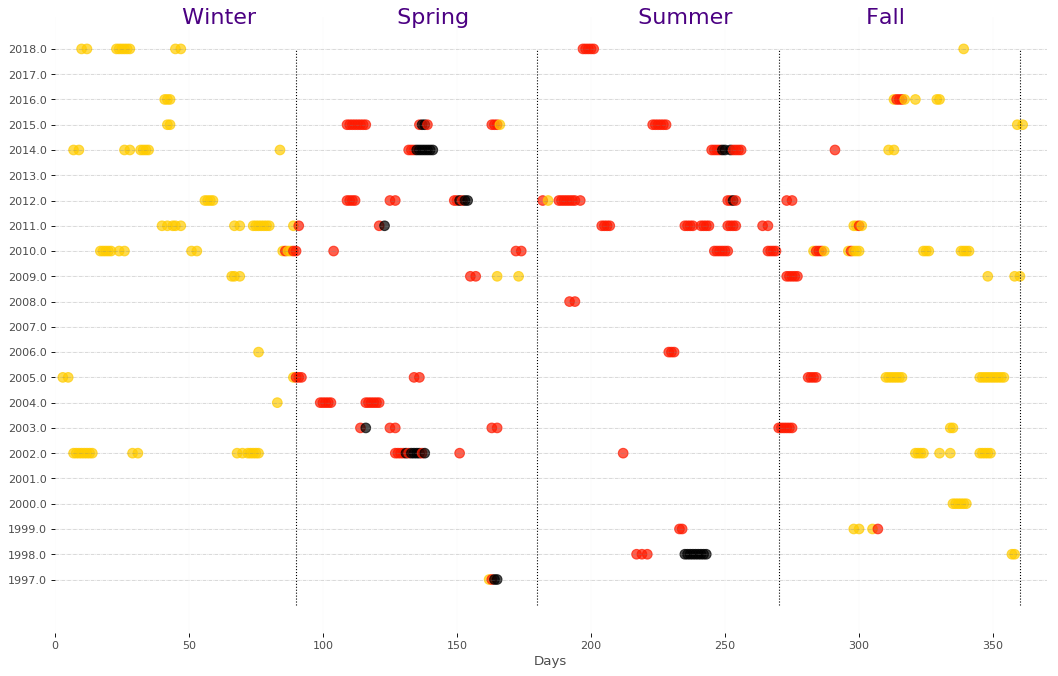

In [99]:
plot_heatwave(fv,flag_heat1)

# Heatwaves with index = 'CTN90pct'

Legend:
- yellow : Air temperature < mean
- reds : mean <= Air temperature < pct90
- black : Air temperature >= pct90

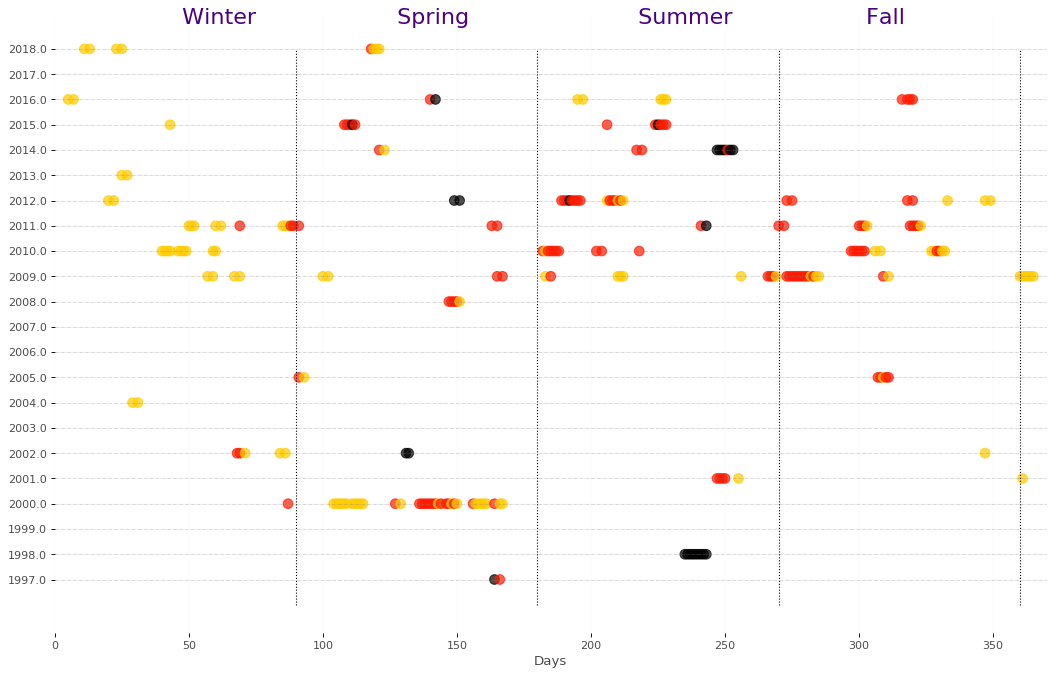

In [100]:
plot_heatwave(fv,flag_heat2)

# Cold waves

According to Forzieri

https://www.researchgate.net/publication/301537238_Multi-hazard_assessment_in_Europe_under_climate_change

auxiliar:

https://www.nat-hazards-earth-syst-sci.net/16/821/2016/nhess-16-821-2016.pdf

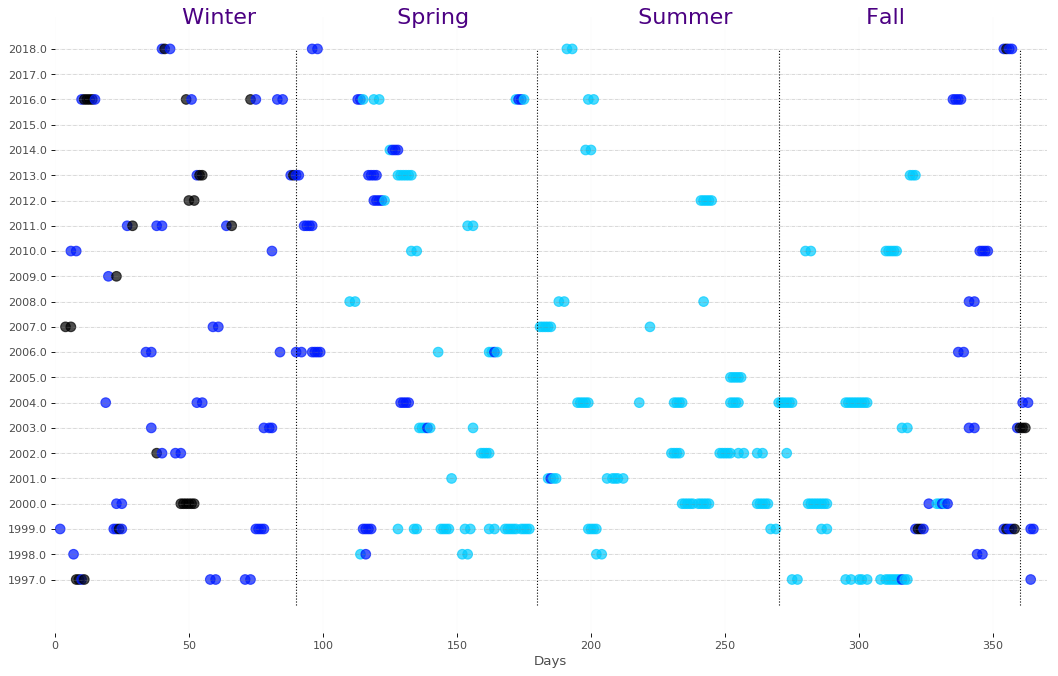

In [101]:
plot_coldwave(fv,flag_heat3)

# Evolution of count HW by years

In [107]:
to_plot = fv[fv[flag_unique1] != 0].groupby('YEAR').agg({flag_unique1 : lambda x: x.nunique()}).reset_index()
to_plot2 = fv[fv[flag_unique2] != 0].groupby('YEAR').agg({flag_unique2 : lambda x: x.nunique()}).reset_index()
to_plot3 = fv[fv[flag_unique3] != 0].groupby('YEAR').agg({flag_unique3 : lambda x: x.nunique()}).reset_index()


to_plot = to_plot.merge(to_plot2, on = 'YEAR', how='left')
to_plot = to_plot.merge(to_plot3, on = 'YEAR', how='left')

In [108]:
flag_unique3

'unique_cold_CTN90pct'

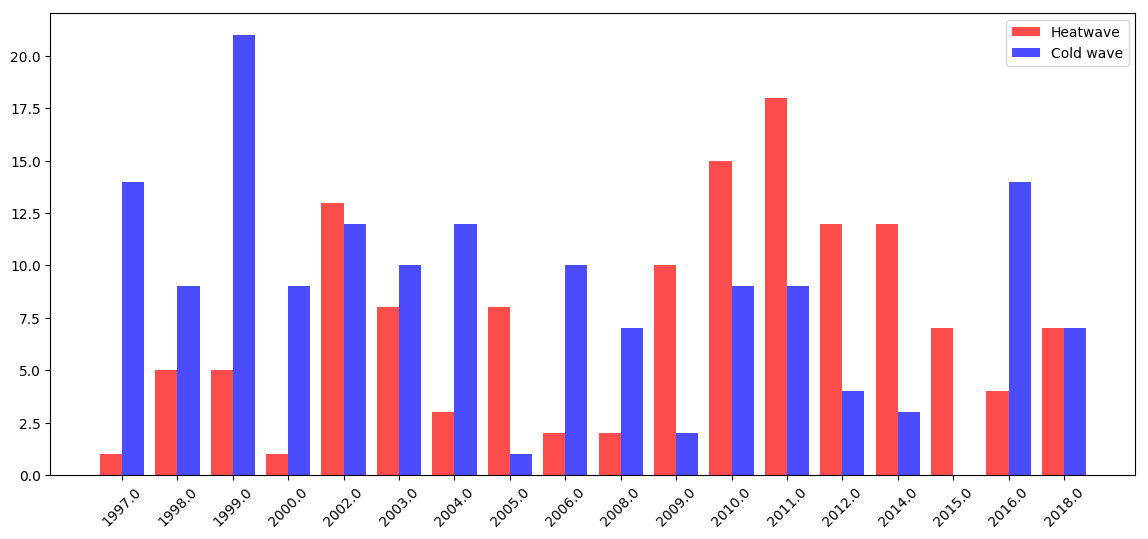

In [145]:
plt.figure(figsize=(14,6))
width = 0.40

plt.bar(np.arange(to_plot.shape[0]) - width/2, to_plot[flag_unique1], width = width,label='Heatwave',color='r',alpha = 0.7)
plt.bar(np.arange(to_plot.shape[0]) + width/2,to_plot[flag_unique3], width = width,label='Cold wave',color='b',alpha = 0.7)

plt.xticks(np.arange(to_plot.shape[0]),to_plot['YEAR'], rotation = 45)

plt.legend()
plt.show()

 So we have some tendence to have more HW by recent years

# Duration of HW

In [119]:
duration_tmin = []
duration_tmax = []
duration_cold = []

for v in fv.YEAR.unique():
    fv_aux = fv[fv['YEAR'] == v]
    
    get = fv_aux[fv_aux[flag_unique1]!= 0].groupby(flag_unique1).agg({flag_heat1 : np.sum}).reset_index()
    if(get.shape[0] > 0):
        duration_tmax.append(get[flag_heat1].mean())
    else:
        duration_tmax.append(0)
    
    get = fv_aux[fv_aux[flag_unique2]!= 0].groupby(flag_unique2).agg({flag_heat2: np.sum}).reset_index()
    if(get.shape[0]> 0):
        duration_tmin.append(get[flag_heat2].mean())
    else:
        duration_tmin.append(0)
        
    get = fv_aux[fv_aux[flag_unique3]!= 0].groupby(flag_unique3).agg({flag_heat3: np.sum}).reset_index()
    if(get.shape[0]> 0):
        duration_cold.append(get[flag_heat3].mean())
    else:
        duration_cold.append(0)

In [120]:
len(duration_tmax)

22

In [121]:
fv.YEAR.nunique()

22

### Mean duration of heat and cold waves

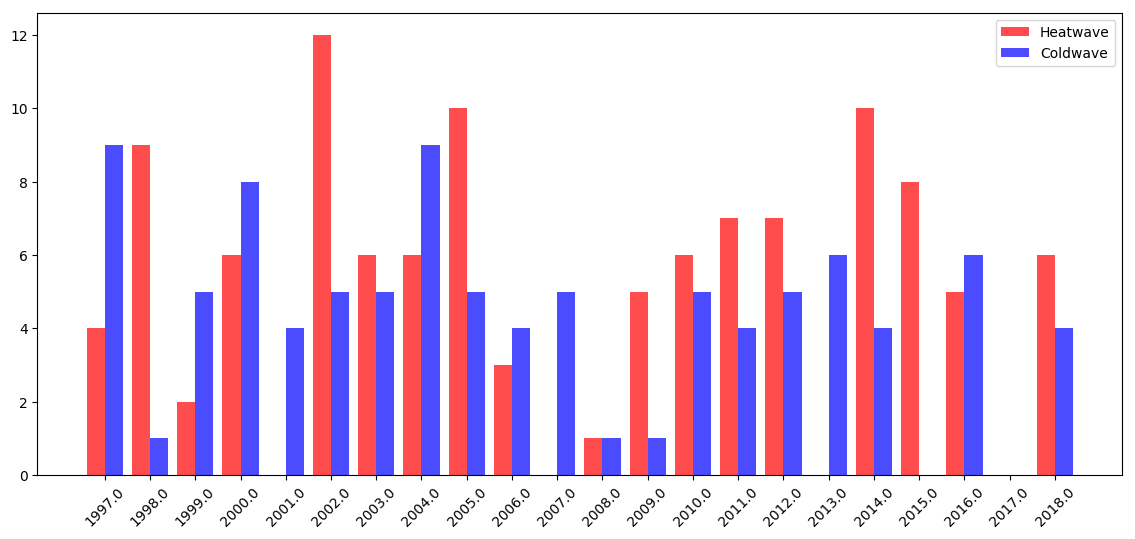

In [141]:
plt.figure(figsize=(14,6))
width = 0.40

plt.bar(np.arange(len(duration_tmax)) - width/2, duration_tmax, width = width,label='Heatwave', color='r', alpha=0.7)
plt.bar(np.arange(len(duration_cold)) + width/2,duration_cold, width = width,label='Coldwave', color='b', alpha=0.7)

plt.xticks(np.arange(fv['YEAR'].nunique()),fv['YEAR'].unique(), rotation = 45)

plt.legend()
plt.show()

It seems that there is no relation between recent years and hw durations

In [127]:
duration_tmin = []
duration_tmax = []
duration_cold = []

for v in fv.YEAR.unique():
    fv_aux = fv[fv['YEAR'] == v]
    
    get = fv_aux[fv_aux[flag_unique1]!= 0].groupby(flag_unique1).agg({flag_heat1 : np.sum}).reset_index()
    if(get.shape[0] > 0):
        duration_tmax.append(get[flag_heat1].max())
    else:
        duration_tmax.append(0)
    
    get = fv_aux[fv_aux[flag_unique2]!= 0].groupby(flag_unique2).agg({flag_heat2: np.sum}).reset_index()
    if(get.shape[0]> 0):
        duration_tmin.append(get[flag_heat2].max())
    else:
        duration_tmin.append(0)
        
    get = fv_aux[fv_aux[flag_unique3]!= 0].groupby(flag_unique3).agg({flag_heat3: np.sum}).reset_index()
    if(get.shape[0]> 0):
        duration_cold.append(get[flag_heat3].max())
    else:
        duration_cold.append(0)

### Max duration of heat/cold waves

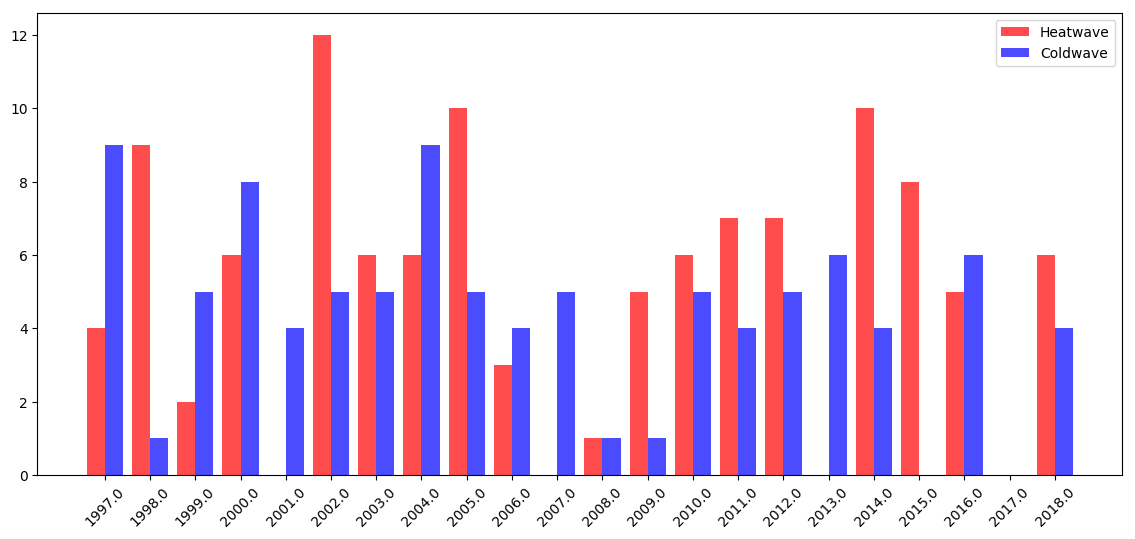

In [140]:
plt.figure(figsize=(14,6))
width = 0.40

plt.bar(np.arange(len(duration_tmax)) - width/2, duration_tmax, width = width,label='Heatwave', color='r', alpha=0.7)
plt.bar(np.arange(len(duration_cold)) + width/2,duration_cold, width = width,label='Coldwave', color='b', alpha=0.7)

plt.xticks(np.arange(fv['YEAR'].nunique()),fv['YEAR'].unique(), rotation = 45)

plt.legend()
plt.show()

# How many days each year were under heat/cold waves?

In [132]:
get = fv.groupby('YEAR').agg({flag_heat3: np.sum}).reset_index()

get2 = fv.groupby('YEAR').agg({flag_heat1: np.sum}).reset_index()

get = get.merge(get2, on='YEAR', how='left')

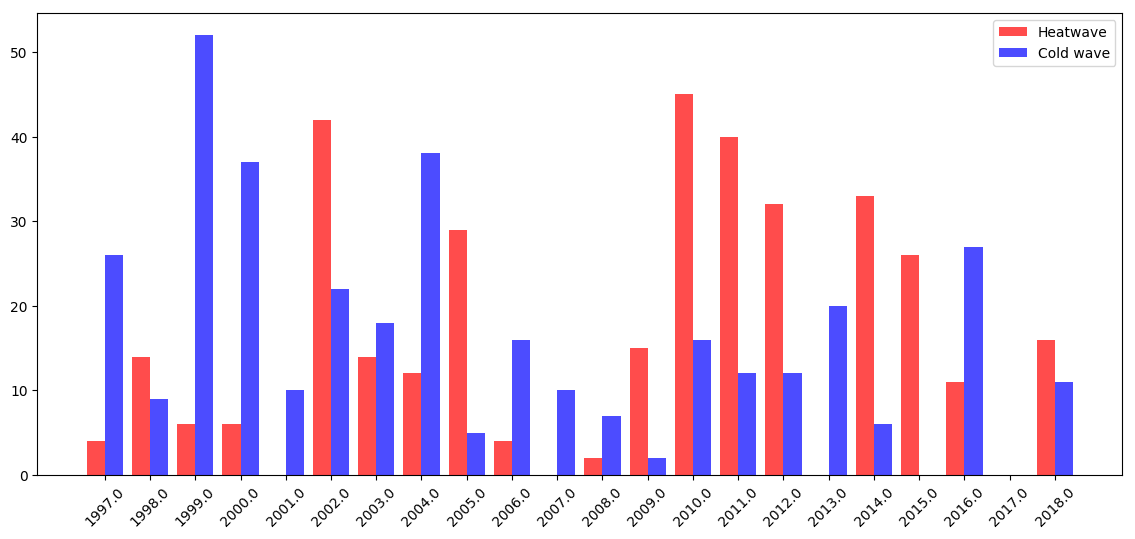

In [139]:
plt.figure(figsize=(14,6))
width = 0.40

plt.bar(np.arange(get.shape[0]) - width/2, get[flag_heat1], width = width,label='Heatwave', color='r', alpha=0.7)
plt.bar(np.arange(get.shape[0]) + width/2,get[flag_heat3], width = width,label='Cold wave', color='b' , alpha=0.7)

plt.xticks(np.arange(get.shape[0]),get['YEAR'], rotation = 45)

plt.legend()
plt.show()

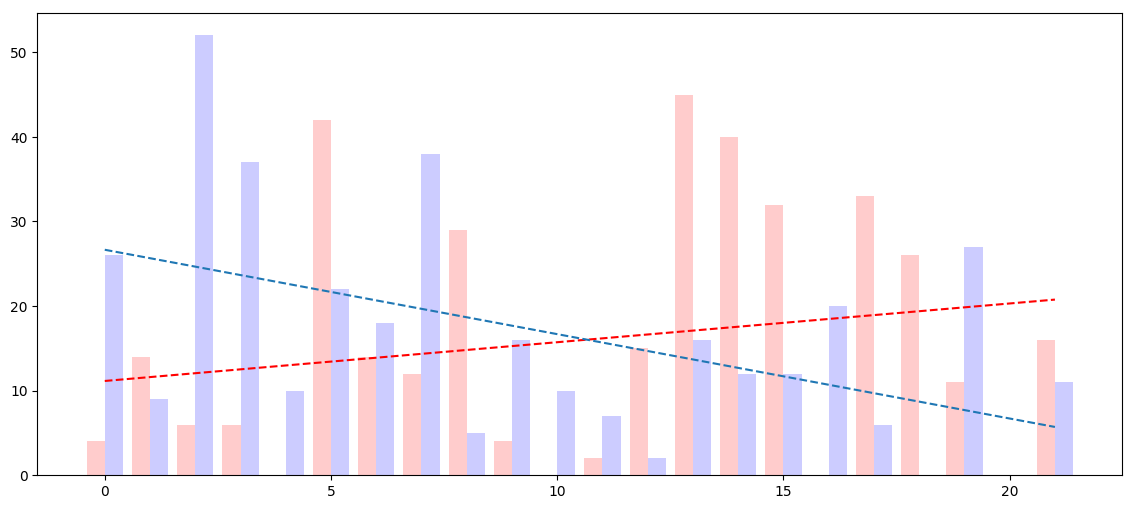

In [159]:
# Creating a scatter plot with best fit line plot

#Heatwave
y_values = get.loc[:, flag_heat1]
x_values = np.linspace(0,1,len(get.loc[:, flag_heat1]))
poly_degree = 1

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat_heat = poly_eqn(x_values)

#Coldwave
y_values = get.loc[:, flag_heat3]
x_values = np.linspace(0,1,len(get.loc[:, flag_heat3]))
poly_degree = 1

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat_cold = poly_eqn(x_values)


plt.figure(figsize=(14,6))
plt.bar(np.arange(get.shape[0]) - width/2, get[flag_heat1], width = width,label='Heatwave', color='r', alpha=0.2)
plt.bar(np.arange(get.shape[0]) + width/2,get[flag_heat3], width = width,label='Cold wave', color='b' , alpha=0.2)

plt.plot(np.arange(get.shape[0]),y_hat_heat,color='r', linestyle='--')

plt.plot(np.arange(get.shape[0]),y_hat_cold, linestyle='--')


# Visualization of Heatwaves and temperatures of 2014

In [85]:
# getting series of pct90 min and max along this year

df_2014 = fv[fv['YEAR'] == 2014]

percentile = .9
day_name = 'DAY365'
max_tmp_name = 'MAX_N_AIRTMP_MED10'
min_tmp_name = 'MIN_N_AIRTMP_MED10'


# pth_max = []
# pth_min = []

# for d in df_2014.DAY365.unique():
#     # For each day we will have a different pct
#     df_pct = data[(data[day_name] >= d-14) & (data[day_name] <= d + 14)]

#     pth_max.append(df_pct[max_tmp_name].quantile(percentile))
#     pth_min.append(df_pct[min_tmp_name].quantile(0.1))
    

In [86]:
df_2014.shape

(365, 81)

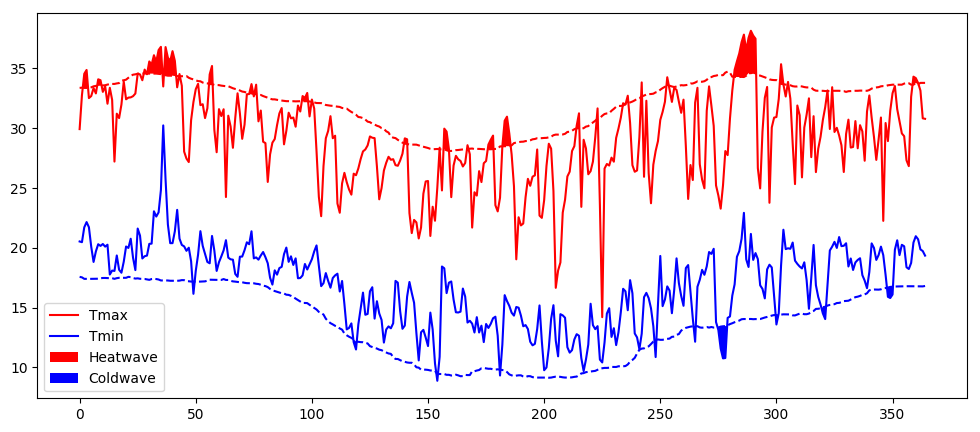

In [144]:
plt.figure(figsize=(12,5))

x = np.arange(len(pth_max))
y1 = df_2014[max_tmp_name]
y2 = pth_max

plt.plot(x,y1, color='r', label='Tmax')
plt.plot(x,y2, color= 'r', linestyle = '--')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True,label='Heatwave')


x = np.arange(len(pth_min))
y1 = df_2014[min_tmp_name]
y2 = pth_min
plt.plot(x,y1,color='b', label='Tmin')
plt.plot(x,y2, color= 'b', linestyle = '--')
plt.fill_between(x, y1, y2, where=y1 <= y2, facecolor='blue', interpolate=True, label='Coldwave')

# plt.xticks(np.arange(df_2014.DAY365.nunique()), df_2014.DAY365.unique(), rotation = 90)

plt.legend()
plt.show()

In [158]:
# fv.to_csv('DATA111_HW.csv',index=False)

In [176]:
import test
import imp
imp.reload(test)

<module 'test' from 'C:\\Users\\Hideki\\Desktop\\IC\\TEMPERATURAS CEPAGRI 1997-2016-20180824T001014Z-001\\TEMPERATURAS CEPAGRI 1997-2016\\test.py'>

In [177]:
test.soma(2,3)

5

In [178]:
test.subtrai(2,3)

-1